# Anime Recommendation System



## Anime Dataset

This dataset is named **anime**. The dataset contains a set of **12,294 records** under **7 attributes**:

| Column Name | Description                                                    |
|-------------|----------------------------------------------------------------|
| `anime_id`  | myanimelist.net's unique id identifying an anime.              |
| `name`      | full name of anime.                                            |
| `genre`     | comma separated list of genres for this anime.                 |
| `type`      | movie, TV, OVA, etc.                                           |
| `episodes`  | how many episodes in this show. (1 if movie).                  |
| `rating`    |  average rating out of 10 for this anime.                      |
| `members`   | number of community members that are in this anime's "group".  |
                                                


## Rating Dataset

This dataset is named **rating**. The dataset contains a set of **7,813,737 records** under **3 attributes**:

| Column Name | Description                                                                        |
|-------------|------------------------------------------------------------------------------------|
| `user_id`   | non identifiable randomly generated user id.                                       |
| `anime_id`  | the anime that this user has rated.                                                |
| `rating`    | rating out of 10 this user has assigned (-1 if the user watched without assigning) |

                                                

## PROPOSED SOLUTION IMPLEMENTATION

# Libraries 

In [5]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import scipy as sp #pivot egineering
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#ML model
from sklearn.metrics.pairwise import cosine_similarity


#default theme and settings
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Preprocessing and Data Analysis

### File Paths 

In [6]:
rating_path = "C:/Users/Asus/jupdoc/Anime/rating.csv"
anime_path = "C:/Users/Asus/jupdoc/Anime/anime.csv"

### First few lines

In [7]:
rating_df = pd.read_csv(rating_path)
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [8]:
anime_df = pd.read_csv(anime_path)
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Data shapes and info

In [9]:
print(f"anime set (row, col): {anime_df.shape}\n\nrating set (row, col): {rating_df.shape}")

anime set (row, col): (12294, 7)

rating set (row, col): (7813737, 3)


In [10]:
print("Anime:\n")
print(anime_df.info())
print("\n","-"*50,"\nRating:\n")
print(rating_df.info())

Anime:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

 -------------------------------------------------- 
Rating:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Handling missing values 

In [11]:
print("Anime missing values (%):\n")
print(round(anime_df.isnull().sum().sort_values(ascending=False)/len(anime_df.index),4)*100) 
print("\n","-"*50,"\nRating missing values (%):\n")
print(round(rating_df.isnull().sum().sort_values(ascending=False)/len(rating_df.index),4)*100)

Anime missing values (%):

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64

 -------------------------------------------------- 
Rating missing values (%):

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64


It seems only the anime dataset has missing values.

In [12]:
# deleting anime with 0 rating
anime_df=anime_df[~np.isnan(anime_df["rating"])]

# filling mode value for genre and type
anime_df['genre'] = anime_df['genre'].fillna(
anime_df['genre'].dropna().mode().values[0])

anime_df['type'] = anime_df['type'].fillna(
anime_df['type'].dropna().mode().values[0])

#checking if all null values are filled
anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [13]:
anime_df.groupby('type').first()

,anime_id,name,genre,episodes,rating,members
type,,,,,,
Movie,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
Music,34240,Shelter,"Music, Sci-Fi",1,8.38,71136
ONA,3167,Eve no Jikan,"Sci-Fi, Slice of Life",6,8.26,99074
OVA,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",110,9.11,80679
Special,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",1,8.66,49036
TV,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665


In [14]:
print(anime_df['type'].mode())
print(anime_df['genre'].mode())

0    TV
dtype: object
0    Hentai
dtype: object


The mode value of `genre` is `Hentai`, the mode value of `type` is `TV`.

In [15]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12064 non-null  int64  
 1   name      12064 non-null  object 
 2   genre     12064 non-null  object 
 3   type      12064 non-null  object 
 4   episodes  12064 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12064 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 754.0+ KB


In [16]:
rating_df['anime_id']

0             20
1             24
2             79
3            226
4            241
           ...  
7813732    16512
7813733    17187
7813734    22145
7813735      790
7813736     8074
Name: anime_id, Length: 7813737, dtype: int64

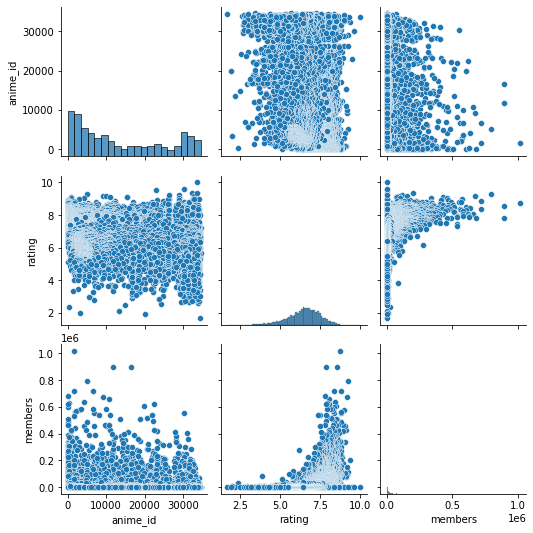

In [17]:
sns.pairplot(anime_df)

## Feeture Engineering 🐱‍💻

### Filling Nan values

In general the value `-1` suggests the user did not register a raiting so we will foll with `Nan` values.


In [18]:
rating_df['rating'] = rating_df['rating'].apply(lambda x: np.nan if x==-1 else x)
rating_df.head(20)

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
5,1,355,NaN
6,1,356,NaN
7,1,442,NaN
8,1,487,NaN
9,1,846,NaN


### Now we will engineer our Dataframe in the following steps:

1. We want to recommend anime series only so the the relevant `type` is `TV`
2. We make a new Dataframe combining both anime and rating on the `anime_id` column.
3. Leaving only `	user_id`, `name` and `rating` as the Df.
4. For computing purpose only we compute our Dataframe based only on the first 7500 users.


In [19]:
#step 1
anime_df = anime_df[anime_df['type']=='TV']

#step 2
rated_anime = rating_df.merge(anime_df, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])

#step 3
rated_anime =rated_anime[['user_id', 'name', 'rating']]

#step 4
rated_anime_7500= rated_anime[rated_anime.user_id <= 7500]
rated_anime_7500.head()

,user_id,name,rating
0,1,Naruto,7.81
1,3,Naruto,7.81
2,5,Naruto,7.81
3,6,Naruto,7.81
4,10,Naruto,7.81


### Pivot Table for similarity

We will create a pivot table of users as rows and tv show names as columns. The pivot table will help us will be analized for the calcuations of similarity.

In [20]:
pivot = rated_anime_7500.pivot_table(index=['user_id'], columns=['name'], values='rating')
pivot.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,6.49,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.11,NaN


### Now we will engineer our pivot table in the following steps:

1. Value normalization.
2. Filling `Nan` values as `0`.
3. Transposing the pivot for the next step.
4. Dropping columns with the values of `0` (unrated).
5. Using `scipy` package to convert to sparse matrix format for the similarity computation.


In [21]:
# step 1
pivot_n = pivot.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# step 2
pivot_n.fillna(0, inplace=True)

# step 3
pivot_n = pivot_n.T

# step 4
pivot_n = pivot_n.loc[:, (pivot_n != 0).any(axis=0)]

# step 5
piv_sparse = sp.sparse.csr_matrix(pivot_n.values)

# 

# Cosine Similarity Model


**formula:**
![](https://cdn-images-1.medium.com/max/579/1*5hJibEtQPavnbgRxg8w2Fg.gif)

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction (more on [sciencedirect](https://www.sciencedirect.com/topics/computer-science/cosine-similarity)).

In [22]:
#model based on anime similarity
anime_similarity = cosine_similarity(piv_sparse)

#Df of anime similarities
ani_sim_df = pd.DataFrame(anime_similarity, index = pivot_n.index, columns = pivot_n.index)

In [23]:
def anime_recommendation(ani_name):
    """
    This function will return the top 5 shows with the highest cosine similarity value and show match percent
    
    example:
    >>>Input: 
    
    anime_recommendation('Death Note')
    
    >>>Output: 
    
    Recommended because you watched Death Note:

                    #1: Code Geass: Hangyaku no Lelouch, 57.35% match
                    #2: Code Geass: Hangyaku no Lelouch R2, 54.81% match
                    #3: Fullmetal Alchemist, 51.07% match
                    #4: Shingeki no Kyojin, 48.68% match
                    #5: Fullmetal Alchemist: Brotherhood, 45.99% match 

               
    """
    ani_name= ani_name.title()
    number = 1
    print('Recommended because you watched {}:\n'.format(ani_name))
    for anime in ani_sim_df.sort_values(by = ani_name, ascending = False).index[1:6]:
        print(f'#{number}: {anime}, {round(ani_sim_df[anime][ani_name]*100,2)}% match')
        number +=1  

In [25]:
anime_recommendation('death note')

Recommended because you watched Death Note:

#1: Code Geass: Hangyaku no Lelouch, 57.35% match
#2: Code Geass: Hangyaku no Lelouch R2, 54.81% match
#3: Fullmetal Alchemist, 51.07% match
#4: Shingeki no Kyojin, 48.68% match
#5: Fullmetal Alchemist: Brotherhood, 45.99% match
